<a href="https://colab.research.google.com/github/NooshinS/Machine-Learning/blob/main/BankClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Scaling
from sklearn.preprocessing import StandardScaler
#Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Splitting
from sklearn.model_selection import train_test_split
#Balancing
import imblearn
from imblearn.over_sampling import ADASYN
#Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [ ]:
#Dataset
df=pd.read_csv('Banking_train.csv')
display(df.head())
display(df.describe())
display(df.dtypes.value_counts())
df.isnull().sum()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


object    11
int64      5
dtype: int64

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
#to find the categorical colmuns
#for i in df.columns:
#  if df[i].dtypes==object:
#    print(df[i].unique())
for i in ('job','marital','education', 'default','housing','loan','contact','month','day_of_week','previous','poutcome','y'):
  print(f'**{i} cathegories:')
  print(df[i].unique())

**job cathegories:
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
**marital cathegories:
['married' 'divorced' 'single' 'unknown']
**education cathegories:
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
**default cathegories:
['unknown' 'no' 'yes']
**housing cathegories:
['no' 'yes' 'unknown']
**loan cathegories:
['no' 'yes' 'unknown']
**contact cathegories:
['cellular' 'telephone']
**month cathegories:
['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
**day_of_week cathegories:
['wed' 'mon' 'tue' 'fri' 'thu']
**previous cathegories:
[0 1 3 4 2 6 5 7]
**poutcome cathegories:
['nonexistent' 'failure' 'success']
**y cathegories:
['no' 'yes']


In [ ]:
# finding the number of unknowns in dataset
for i in ('job','marital','education', 'default','housing','loan'):
  print(df[i].value_counts())

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64
no         26007
unknown     6940
yes            3
Name: default, dtype: int64
yes        17254
no         14900
unknown      796
Name: housing, dtype: int64
no         27131
yes         5023
unknown      796
Name: loan, dtype: int64


In [ ]:
#Replace unknown values with nan and drop the nan values
df=df.applymap(lambda x: np.nan if x == 'unknown' else x)
df.dropna(inplace=True)
#Checking the nan values
for i in ('job','marital','education', 'default','housing','loan'):
  print(df[i].value_counts())


admin.           6960
blue-collar      4535
technician       4346
services         2294
management       1869
retired           974
entrepreneur      854
self-employed     842
unemployed        581
housemaid         558
student           492
Name: job, dtype: int64
married     13952
single       7546
divorced     2807
Name: marital, dtype: int64
university.degree      8319
high.school            6127
professional.course    3450
basic.9y               3380
basic.4y               1888
basic.6y               1130
illiterate               11
Name: education, dtype: int64
no     24302
yes        3
Name: default, dtype: int64
yes    13174
no     11131
Name: housing, dtype: int64
no     20491
yes     3814
Name: loan, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75100201d0>,
      dtype=object)

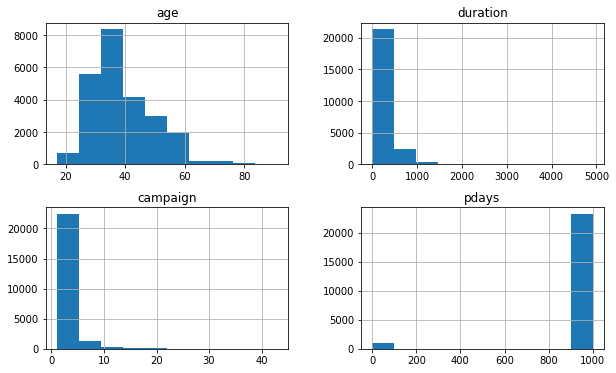

In [ ]:
num_vars= ['age', 'duration', 'campaign', 'pdays']
df.hist(num_vars, figsize = (10,6))

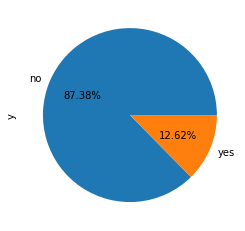

In [ ]:
#Define the percentage of man and woman
df['y'].value_counts().plot.pie(autopct="%2.2f%%")


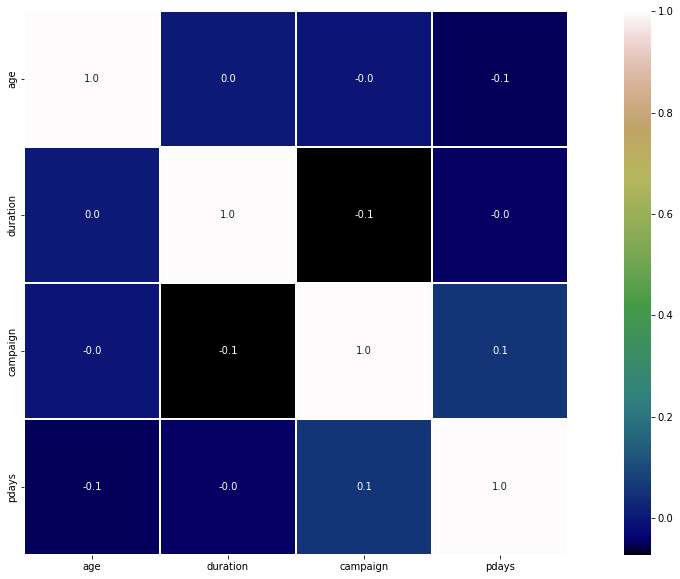

In [ ]:
#Correlation Matrix Plots show
plt.figure(figsize=(20,10))
df_co = df[num_vars].corr()
sns.heatmap(df_co,cbar = True,  square = True, annot = True, fmt= '.1f',xticklabels= True, yticklabels= True,cmap='gist_earth', linewidths=.5)


In [ ]:
#Scaling
sc = StandardScaler()
x=np.array(df['age'])
x=np.reshape(x,(1,len(x)))
cont_cols=['age','duration','pdays','campaign']
for i in cont_cols:
  x=np.array(df[i])
  x=np.reshape(x,(len(x),1))
  df[i]=sc.fit_transform(x)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1,-0.194125,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,-0.219448,-0.189148,0.213543,1,failure,no
2,3.776365,retired,married,basic.4y,no,no,no,cellular,jul,mon,3.412624,-0.560611,0.213543,0,nonexistent,yes
3,-0.290966,admin.,married,university.degree,no,yes,no,telephone,may,mon,-0.534279,-0.189148,0.213543,0,nonexistent,no
4,1.936382,retired,divorced,university.degree,no,no,no,cellular,jun,tue,0.417892,-0.189148,0.213543,0,nonexistent,no
5,-0.968855,admin.,single,university.degree,no,no,no,cellular,aug,wed,-0.012121,-0.189148,0.213543,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.065696,services,single,high.school,no,yes,no,cellular,jul,tue,-0.257842,-0.560611,0.213543,0,nonexistent,no
32946,1.258494,technician,married,professional.course,no,yes,no,cellular,nov,fri,-0.749286,-0.560611,0.213543,1,failure,no
32947,1.452176,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,-0.492046,0.553779,0.213543,0,nonexistent,no
32948,-0.968855,admin.,married,university.degree,no,no,no,telephone,may,fri,-0.361506,-0.560611,0.213543,0,nonexistent,no


In [ ]:
#Encoding
le=LabelEncoder()
booleans=['default','housing','loan','contact', 'y']
for i in booleans:
  df[i]=le.fit_transform(df[i])
x=df.iloc[ : , :-1].values
y=df.iloc[ : ,-1].values
ct=ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1,2,3,8,9,14])], remainder ="passthrough")
x=np.array(ct.fit_transform(x))
x


array([[0.0, 0.0, 1.0, ..., -0.1891475787206562, 0.21354268065456639, 1],
       [0.0, 0.0, 0.0, ..., -0.5606110484043626, 0.21354268065456639, 0],
       [1.0, 0.0, 0.0, ..., -0.1891475787206562, 0.21354268065456639, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 0.5537793606467566, 0.21354268065456639, 0],
       [1.0, 0.0, 0.0, ..., -0.5606110484043626, 0.21354268065456639, 0],
       [1.0, 0.0, 0.0, ..., 0.18231589096305018, 0.21354268065456639, 0]],
      dtype=object)

In [ ]:
#spliting
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0 )


In [ ]:
#Balancing
adasyn = ADASYN()
xo_train, yo_train = adasyn.fit_resample(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Training SVM
classifierSVM=SVC(kernel="linear", random_state=0, probability=True)
classifierSVM.fit(xo_train, yo_train)
y_pred = classifierSVM.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 1]]


In [ ]:
#Training Naive bayes
classifierNB=GaussianNB()
classifierNB.fit(xo_train, yo_train)
y_pred1 = classifierNB.predict(x_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 1]]


In [ ]:
#Confusion Matrix
cmSVM=confusion_matrix(y_test, y_pred)
print(cmSVM)
print(accuracy_score(y_test, y_pred))
cmNB=confusion_matrix(y_test, y_pred1)
print(cmNB)
print(accuracy_score(y_test, y_pred1))

[[3485  758]
 [  81  537]]
0.8274017691832957
[[2832 1411]
 [ 134  484]]
0.6821641637523144


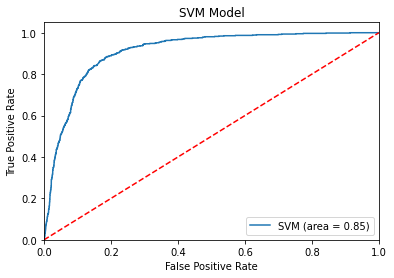

In [ ]:
#ROC Curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifierSVM.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

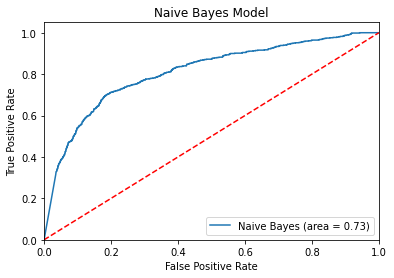

In [ ]:
logit_roc_auc1 = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, classifierNB.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()